# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

**Описание столбцов датасета:**

* total_images - число фотографий квартиры в объявлении
  
* last_price - цена на момент снятия с публикации
    
* total_area - общая площадь квартиры в квадратных метрах (м²)
* first_day_exposition - дата публикации
* rooms - число комнат
* ceiling_height - высота потолков (м)
* floors_total - всего этажей в доме
* living_area - жилая площадь в квадратных метрах (м²)
* floor - этаж
* is_apartment - апартаменты (булев тип)
* studio -  квартира-студия (булев тип)
* open_plan - свободная планировка (булев тип)
* kitchen_area - площадь кухни в квадратных метрах (м²)
* balcony - число балконов
* locality_name -  название населённого пункта
* airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest - расстояние до центра города (м)
* parks_around3000 - число парков в радиусе 3 км
* parks_nearest - расстояние до ближайшего парка (м)
* ponds_around3000 - число водоёмов в радиусе 3 км
* ponds_nearest - расстояние до ближайшего водоёма (м)
* days_exposition -  сколько дней было размещено объявление (от публикации до снятия)

### Откройте файл с данными и изучите общую информацию

In [1]:
# загрузим библиотеки
import pandas as pd
import matplotlib.pyplot as plt

Открываем файл с помощью библиотеки pandas:

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Общая информация:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Строим гистограммы всех столбцов на одном графике:

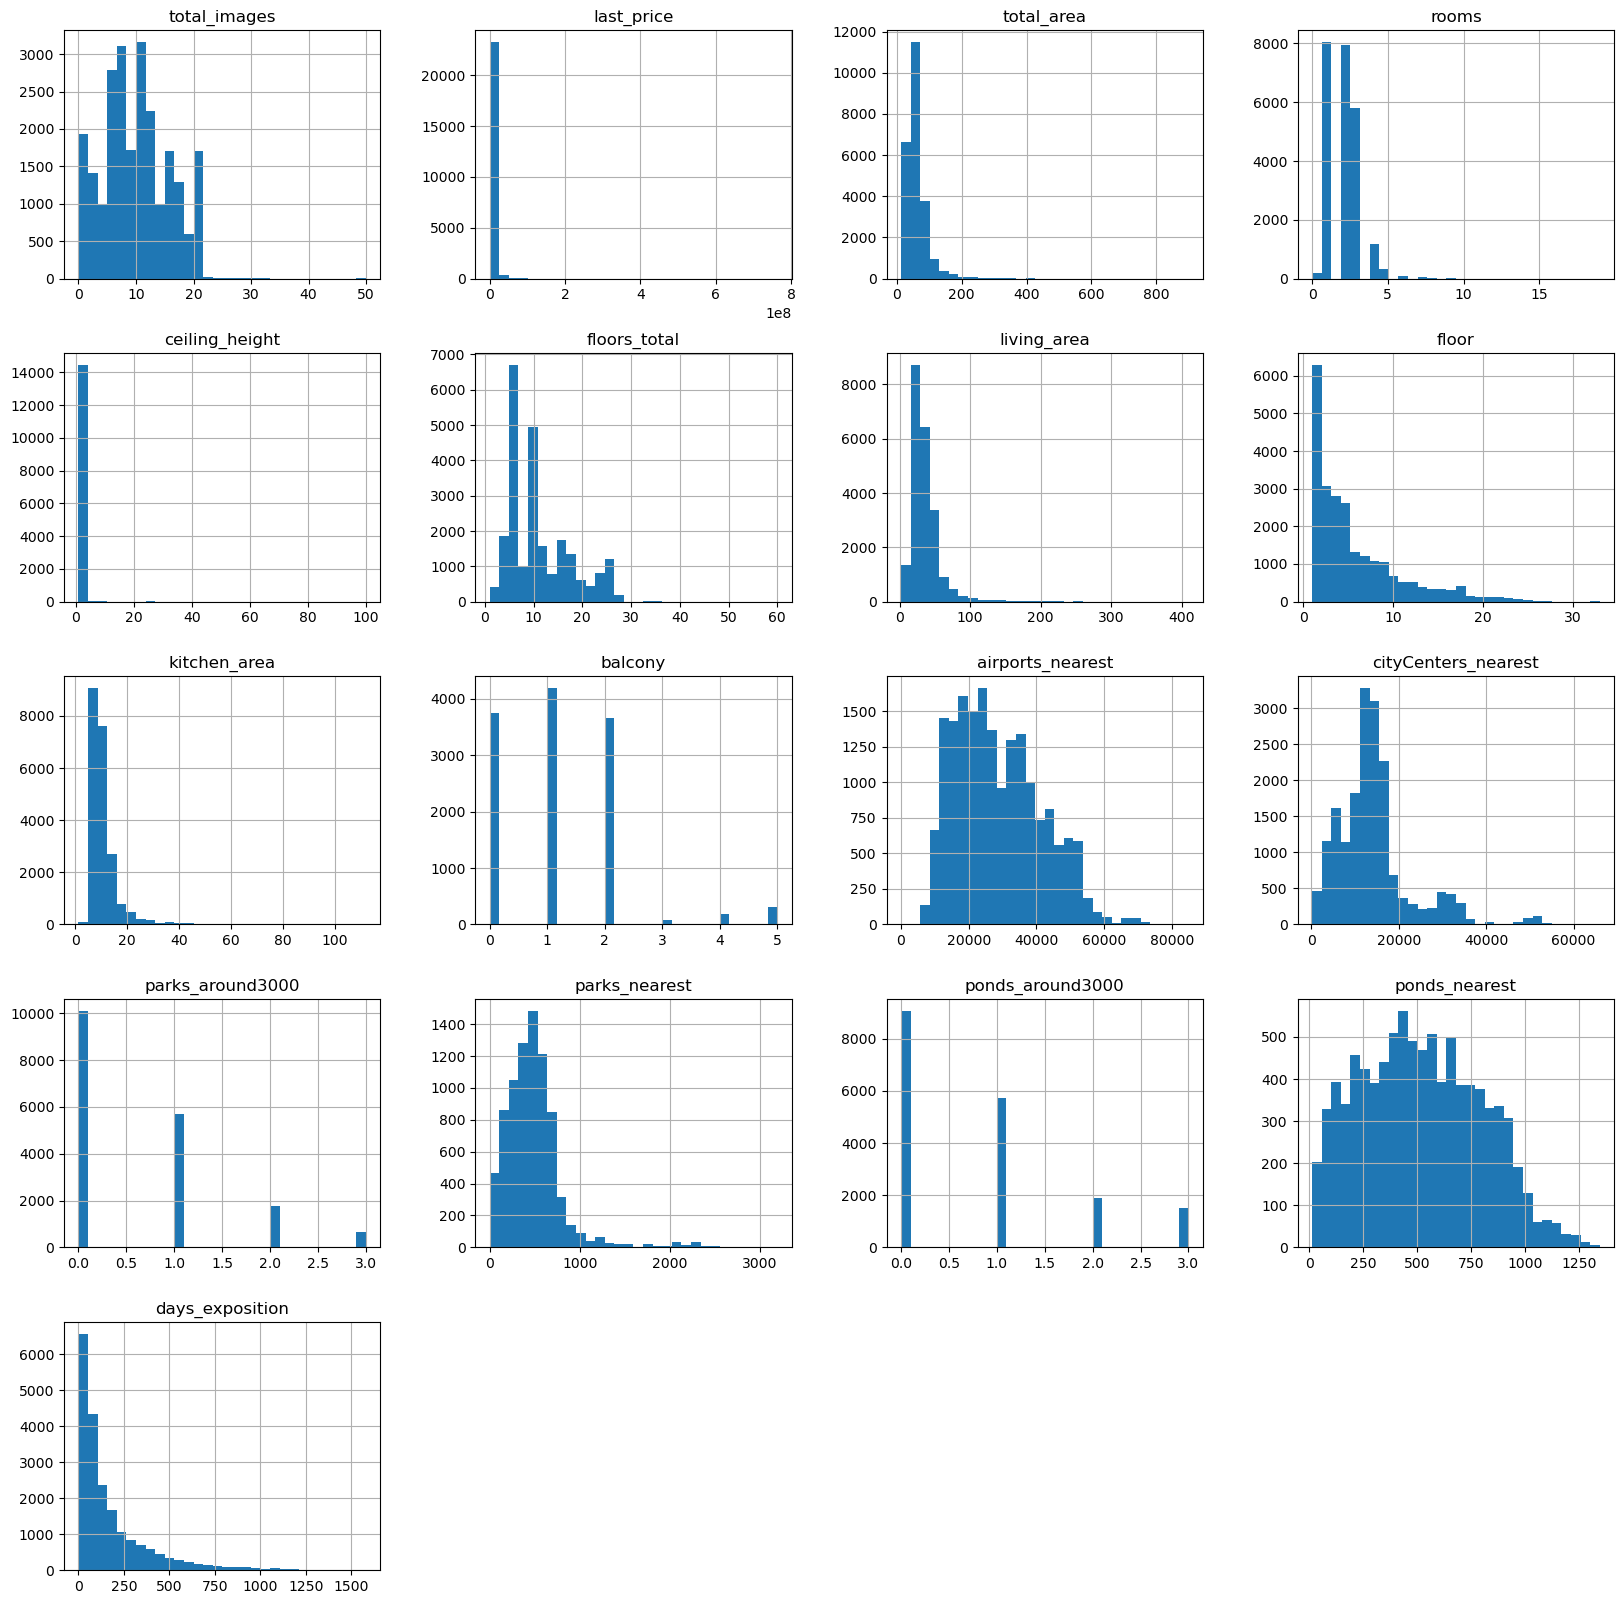

In [4]:
data.hist(figsize=(20, 20), bins=30);

Предварительно по гистограммам можно сказать, что некоторые столбцы имеют характер нормального распределения (наиболее частые значения оказываются посередине, а редкие — по краям, график симметричен):
- число фотографий квартиры в объявлении,
    
- жилая площадь,
- расстояние до ближайшего аэропорта в метрах,
- расстояние до центра города,
- расстояние до ближайшего парка,
- расстояние до ближайшего водоема.

Некоторые столбцы имеют вид распределения Пуассона (самое большое количество значений сосредоточено ближе к 0, при увеличении значений, кол-во таких значений сокращается):
- этаж,

- площадь кухни (но и заметно стремление к нормальному распределению),
    
- общая площадь (но виден и характер нормального распределения)

- количество комнат (тоже наблюдается стремление к нормальному распределению),
- число парков в радиусе 3 км,
- число водоемов в радиусе 3 км,
- сколько дней было размещено объявление (от публикации до снятия)
    
По некоторым графикам сложно что-то сказать о распределении, их нужно рассматривать отдельно и детальнее:

- цена на момент снятия с публикации
    
- высота потолков
- количество балконов
- этажность в доме

### Выполните предобработку данных

#### Найдем и изучим пропущенные значения в столбцах

In [5]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропущенные значения в столбце 'balcony', т.к. скорее всего балконов нет.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

У столбцов floors_total и locality_name пропущенных значений не так много (86 и 49), чтобы значительно потерять данные.
Удаляем строки, т.к. параметры важные, заполнять их средним или медианой (в случае floors_total) неправильно - лучше удалить строки.

In [7]:
data = data.dropna(subset=['locality_name', 'floors_total'])

Проверим кол-во пропущенных значений снова, обращая внимание на проработанные выше столбцы:

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment            20805
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

living_area и kitchen_area можно заменить пропорцией: как у нас соотносятся данные в этих столбцах.

По потолкам ceiling_height обработаем пропуски позже после удаления дубликатов в столбце locality_name.

Проуски в столбцах living_area и kitchen_area можно заменить пропорцией: как у нас соотносятся данные в этих столбцах. Посмотрим на мин и макс значения этих параметров, чтоб выбрать между средним или медианой:

In [9]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,14481.000000,23565.000000,21700.000000,23565.000000,21343.000000,23565.000000,18041.000000,18064.000000,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.771283,10.675875,34.454822,5.878124,10.560994,0.593677,28797.082701,14192.656056,0.611569,490.580448,0.769499,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,1.261983,6.594823,22.045359,4.871485,5.900630,0.960660,12632.499735,8613.348153,0.802088,341.572956,0.938669,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.510000,5.000000,18.600000,2.000000,7.000000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,0.000000,26757.000000,13096.500000,0.000000,455.000000,1.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Макс значение living_area 409.7 и мин значение 2.0 - не очень-то правдоподобные значения) надежнее взять медиану 

In [10]:
koef_living_kitchen = (data['living_area']/data['kitchen_area']).median()
koef_living_kitchen

3.317647058823529

заполним пропуски в kitchen_area медианной пропорцией:

In [11]:
data['kitchen_area'] = data['kitchen_area'].fillna(data['living_area']/koef_living_kitchen)

Проверим пропуски после заполнения:

In [12]:
data['kitchen_area'].isna().sum()

1427

Вместо первоначальных 2222 пропусков стало 1427. Неидеально, но лучше. Поступим теперь по аналогии с пропусками в столбце living_area:

Проверим еще раз, сколько пропусков в этом столбце:

In [13]:
data['living_area'].isna().sum()

1865

заполним пропуски в living_area медианной пропорцией:

In [14]:
data['living_area'] = data['living_area'].fillna(data['kitchen_area']*koef_living_kitchen)
data['living_area'].isna().sum()

1427

Осталось 1427 пропусков - столько же, как и в kitchen_area. Оставляем эти пропуски

#### Изучим типы данных в столбцах

In [15]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [16]:
data.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        14481 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           22138 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          2760 non-null   object 
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          22138 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest      18

Начнем с first_day_exposition - тип данных float64, переведем в тип datetime64:

In [17]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Далее столбец is_apartment пропуски заменим на False, т.к. скорее всего, если не заполнены, то это не апартаменты. И тип данных изменится на нужный - bool.

In [18]:
data['is_apartment'] = data['is_apartment'].fillna(False)

Проверяем:

In [19]:
data['is_apartment'].unique()

array([False,  True])

In [20]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Столбец 'balcony' можно перевести в целые числа int64 (сейчас они в дробных float64):

In [21]:
data['balcony'] = data['balcony'].astype('int')

Проверяем 

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           22138 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          22138 non-null  float64       
 13  balcony              

#### Поработаем с дубликатами в столбце 'locality_name'.

 Сначала посчитаем и посмотрим уникальные значения (отсортируем для удобства):

In [23]:
data['locality_name'].nunique()

364

In [24]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Во-первых, избавимся от букв ё - заменим их на е. Во-вторых, заменим все названия, означающих "не город" на поселок. Садовые товарищества заменим на снт.

In [25]:
data['locality_name'] = (
    data['locality_name'].str.replace('ё', 'е')
    .replace(['городской поселок', 'деревня', 'коттеджный поселок', 'поселок городского типа', 'поселок станции',
    'поселок при железнодорожной станции', 'поселок станции'], 'поселок', regex=True)
)
data['locality_name'] = data['locality_name'].replace('село ', 'поселок ', regex=True)
data['locality_name'] = data['locality_name'].replace(
    ['садоводческое некоммерческое товарищество', 'садовое товарищество'], 'снт', regex=True)

Проверим, как изменились кол-во уникальных значений и их список:

In [26]:
data['locality_name'].nunique()

311

In [27]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'поселок Агалатово', 'поселок Александровская',
       'поселок Алексеевка', 'поселок Аннино', 'поселок Аро',
       'поселок Барышево', 'поселок Батово', 'поселок Бегуницы',
       'поселок Белогорка', 'поселок Белоостров', 'поселок Большая Вруда',
       'поселок Большая Ижора', 'поселок Большая Пустомержа',
       'поселок Большие Колпаны', 'поселок Большое Рейзино',
       'посело

Отлично - сначала идут города, затем поселки, затем снт - всего 3 группы

#### Теперь заменим пропуски в столбце ceiling_height медианой по населенным пунктам:

In [28]:
ceiling_median = data.groupby('locality_name')['ceiling_height'].agg('median')
ceiling_median

locality_name
Бокситогорск         3.90
Волосово             2.50
Волхов               2.58
Всеволожск           2.70
Выборг               2.55
                     ... 
снт Лесная Поляна     NaN
снт Новая Ропша      2.75
снт Приладожский      NaN
снт Рахья            2.60
снт Садко             NaN
Name: ceiling_height, Length: 311, dtype: float64

Так не получится заполнить, в некоторых locality_name все равно будут пропуски по потолкам. Тогда попробуем населенные пункты объединить в категории и заполнить медианой по категориям locality_name.

Создадим столбец с категориями по населенным пунктам: город, поселок, снт и отдельно Санкт-Петербург, т.к. все данные по недвижимости могут сильно отличаться в Петербурге от остальных населенных пунктов.

In [29]:
def categorize_locality_name(row):
    try:
        if 'поселок' in row:
            return 'поселок'
        elif 'снт' in row:
            return 'снт'
        elif 'Санкт-Петербург' in row:
            return 'Санкт-Петербург'
        else:
            return 'город'
    except:
        return 'нет категории'
data['locality_category'] = data['locality_name'].apply(categorize_locality_name)

Проверяем столбец в таблице:

In [30]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Столбец появился, категории верные. Теперь можем заполнить пропуски в ceiling_heights:

In [31]:
for categ in data['locality_category'].unique():
    data.loc[(data['locality_category'] == categ) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['locality_category'] == categ), 'ceiling_height'].median()

Проверяем, что пропущенных значений нет:

In [32]:
data['ceiling_height'].isna().sum()

0

И посмотрим на измнения в таблице:

In [33]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,2,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Итак, по 2 шагу выполнена предобработка данных:
    
- изучены пропущенные значения и заполнены пропущенные значения в столбцах с балконами, булев массив "апартаменты", с жилой площадью и площадью кухни (по возможности), высотой потолков, удалены строки с пропусками в населенных пнуктах и общей этажности здания;

- изучены и изменены некорректные типы данных в столбцах с датой публикации и балконами.
- изучены уникальные значения в столбце с названиями населенных пунктов и устранены неявные дубликаты, а также добавлены 4 категории для населенных пунктов.

### Добавьте в таблицу новые столбцы

проверим еще раз, где остались пропуски:

In [34]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area              1427
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             1427
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
locality_category           0
dtype: int64

Приступим к заданию.

#### Добавим новый столбец с ценой одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой)

Добавим столбец и проверим столбец в таблице.

In [35]:
data['one_meter_price'] = round(data['last_price']/data['total_area'], 2) 
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00


#### Добавим столбец: день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

Добавляем столбец и проверяем столбец в таблице.

In [36]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,поселок,82920.79,1
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1


#### Добавим столбец - месяц публикации объявления:

Добавляем столбец и проверяем в таблице:

In [37]:
data['exposition_month'] = data['first_day_exposition'].dt.month
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,поселок,82920.79,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6


#### Добавим столбец - год публикации объявления:

Добавляем столбец и проверяем в таблице:

In [38]:
data['exposition_year'] = data['first_day_exposition'].dt.year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,0.0,NaN,0.0,NaN,81.0,поселок,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018


#### Добавим столбец - тип этажа квартиры (значения — «первый», «последний», «другой»):
Создадим функцию для определения категории этажа по данным из 2х столбцов floor и floors_total и добавим новый столбец с помощью этой функции:

In [39]:
def floor_category_calc(row):
    try:
        if row['floor']==1:
            return 'первый'
        elif row['floor']==row['floors_total']:
            return 'последний'
        else:
            return 'другой'
    except:
        return 'нет категории'
data['floor_category'] = data.apply(floor_category_calc, axis=1)

Проверяем:

In [40]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,NaN,0.0,NaN,81.0,поселок,82920.79,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой


#### Добавим столбец - расстояние до центра города в километрах (переведите из м в км и округлите до ближайших целых значений):

Для начала переименую столбец cityCenters_nearest для единообразия всей таблицы)

In [41]:
data = data.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Переводим м в км, округляем до ближайших целых значений и создаем столбец:

In [42]:
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000, 0)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.60,11.0,18.6,1,False,...,0.0,NaN,81.0,поселок,82920.79,1,12,2018,первый,19.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14.0,NaN,9,False,...,3.0,234.0,424.0,Санкт-Петербург,408176.10,4,7,2015,другой,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,1.0,48.0,121.0,Санкт-Петербург,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров

##### Общая площадь

Сделаю описание основных параметров данных:

In [43]:
data.describe()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_meter_price,exposition_weekday,exposition_month,exposition_year,city_centers_nearest_km
count,23565.000000,2.356500e+04,23565.000000,23565,23565.000000,23565.000000,23565.000000,22138.000000,23565.000000,22138.000000,...,18065.000000,8030.000000,18065.000000,9036.000000,20394.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,18064.000000
mean,9.878421,6.540058e+06,60.322824,2017-11-10 08:59:53.125398016,2.070656,2.725847,10.675875,34.628368,5.878124,10.503711,...,0.611569,490.580448,0.769499,518.289509,180.741395,9.940584e+04,2.567367,6.401570,2017.371016,14.186504
min,0.000000,1.219000e+04,12.000000,2014-11-27 00:00:00,0.000000,1.000000,1.000000,2.000000,1.000000,0.602837,...,0.000000,1.000000,0.000000,13.000000,1.000000,1.118300e+02,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,2017-05-15 00:00:00,1.000000,2.560000,5.000000,18.800000,2.000000,7.000000,...,0.000000,288.000000,0.000000,293.000000,45.000000,7.656613e+04,1.000000,3.000000,2017.000000,9.000000
50%,9.000000,4.646000e+06,52.000000,2017-12-12 00:00:00,2.000000,2.700000,9.000000,30.000000,4.000000,9.000000,...,0.000000,455.000000,1.000000,503.000000,95.000000,9.500000e+04,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.790000e+06,69.700000,2018-08-26 00:00:00,3.000000,2.700000,16.000000,42.400000,8.000000,12.000000,...,1.000000,612.000000,1.000000,730.000000,231.000000,1.142132e+05,4.000000,10.000000,2018.000000,16.000000
max,50.000000,7.630000e+08,900.000000,2019-05-03 00:00:00,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,...,3.000000,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,6.000000,12.000000,2019.000000,66.000000
std,5.681156,1.091093e+07,35.657060,NaN,1.078591,0.991623,6.594823,22.164576,4.871485,5.966094,...,0.802088,341.572956,0.938669,278.009558,219.732782,5.038943e+04,1.788279,3.492948,1.037393,8.621131


Построим гистограмму по общей площади:

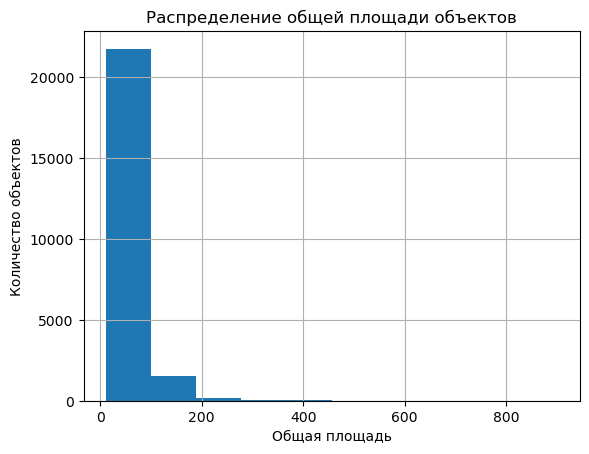

In [44]:
data['total_area'].hist()
# Добавление названия осей и графика
plt.xlabel('Общая площадь')
plt.ylabel('Количество объектов')
plt.title('Распределение общей площади объектов')
plt.show()

Вижу по методу describe, что мин значение 12 и макс 900. А нормальное распределение находится как будто в пределах 200. Проверим:

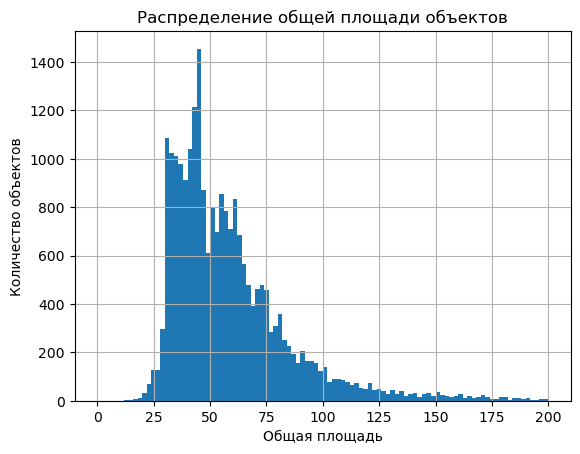

In [45]:
data['total_area'].hist(bins=100, range=(0,200))
plt.xlabel('Общая площадь')
plt.ylabel('Количество объектов')
plt.title('Распределение общей площади объектов')
plt.show()

Похоже на нормальное распределение, построим диаграмму размаха:

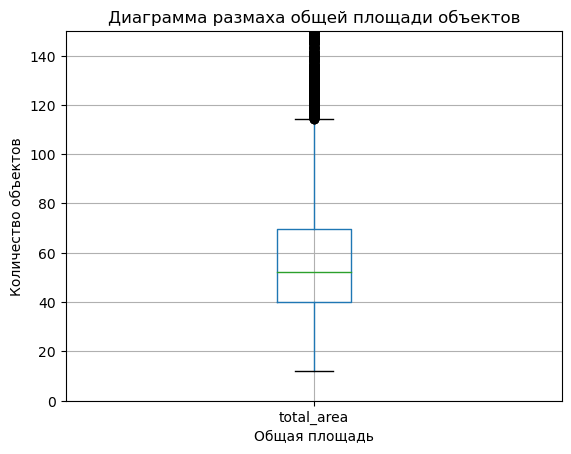

In [46]:
import matplotlib.pyplot as plt
plt.ylim(0, 150)
data.boxplot('total_area')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объектов')
plt.title('Диаграмма размаха общей площади объектов')
plt.show()

Вообще, выбросами можно назвать все значения > 115, посчитаем их долю:

In [47]:
len(data.query('total_area > 115'))/len(data['total_area'])*100

5.13049013367282

5% многовато. Попробуем исключить выбросы хотя бы > 300:

In [48]:
len(data.query('total_area > 300'))/len(data['total_area'])*100

0.2588584765542118

0.26% - столько данных можно исключить. Исключаем и проверяем по макс.значению в методе describe:

In [49]:
data = data.query('total_area <= 300')
data['total_area'].describe()

count    23504.000000
mean        59.420008
std         30.512001
min         12.000000
25%         40.000000
50%         52.000000
75%         69.300000
max        300.000000
Name: total_area, dtype: float64

 ##### Жилая площадь


Строим гистограмму по жилой площади:

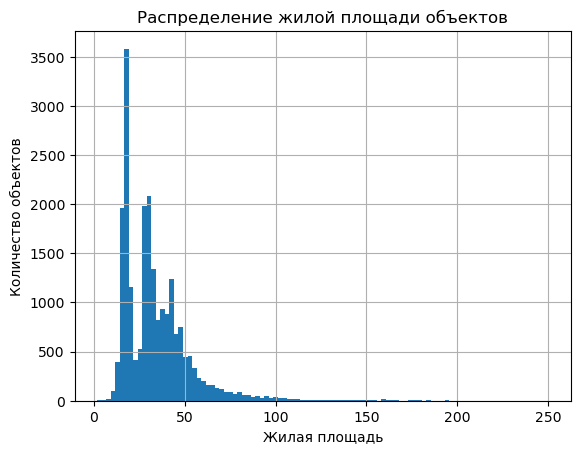

In [50]:
data['living_area'].hist(bins=100)
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объектов')
plt.title('Распределение жилой площади объектов')
plt.show()

Мы видим 2-3 пика нормального распределения, посомотрим на диаграмме размаха и метод describe:

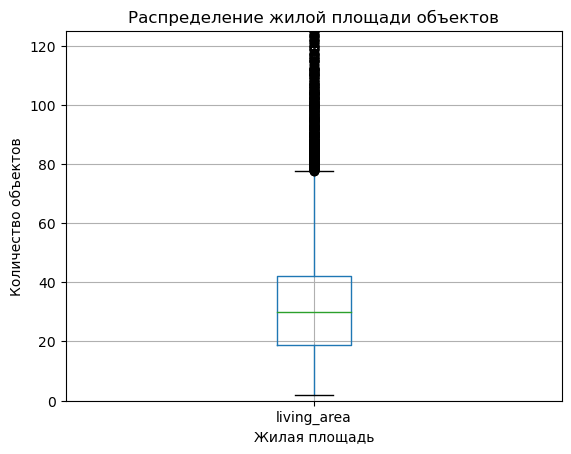

In [51]:
plt.ylim(0,125)
data.boxplot('living_area')
plt.xlabel('Жилая площадь')
plt.ylabel('Количество объектов')
plt.title('Распределение жилой площади объектов')
plt.show()

In [52]:
data['living_area'].describe()

count    22086.000000
mean        34.193806
std         19.994457
min          2.000000
25%         18.700000
50%         30.000000
75%         42.300000
max        250.000000
Name: living_area, dtype: float64

По диаграмме выбросами можно считать значения > 75. Попробуем посчитать их долю:

In [53]:
len(data.query('living_area > 75'))/len(data['living_area'])*100

3.5228046289993196

3.5% многовато. Еще раз посмотрим на графики. Посчитаем долю выбросов со значениями > 150:

In [54]:
len(data.query('living_area > 150'))/len(data['living_area'])*100

0.33185840707964603

0.3% уже не так много, отбрасываем и проверяем:

In [55]:
data = data.query('living_area <= 150')
data['living_area'].describe()

count    22008.000000
mean        33.709129
std         18.261686
min          2.000000
25%         18.700000
50%         30.000000
75%         42.100000
max        150.000000
Name: living_area, dtype: float64

##### Площадь кухни

Строим гистограмму по площади кухни:

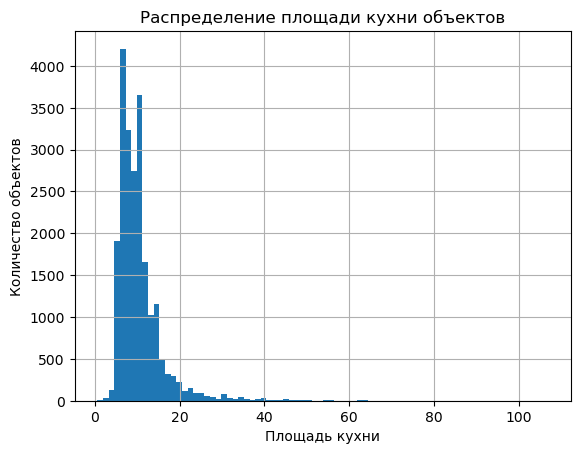

In [56]:
data['kitchen_area'].hist(bins=80)
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объектов')
plt.title('Распределение площади кухни объектов')
plt.show()

Построим диграмму размаха и сделаем описание:

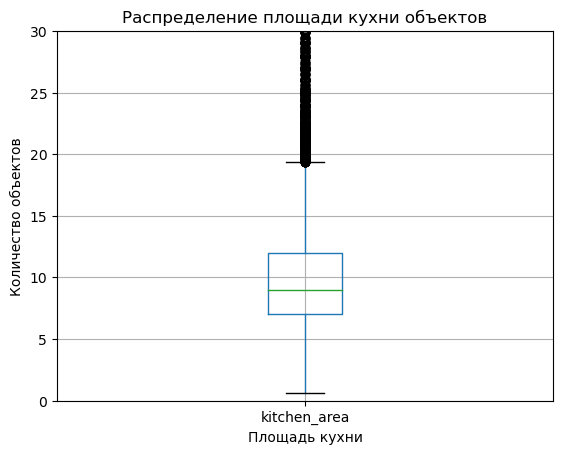

In [57]:
plt.ylim(0,30)
data.boxplot('kitchen_area')
plt.xlabel('Площадь кухни')
plt.ylabel('Количество объектов')
plt.title('Распределение площади кухни объектов')
plt.show()

In [58]:
data['kitchen_area'].describe()

count    22008.000000
mean        10.371287
std          5.553551
min          0.602837
25%          7.000000
50%          9.000000
75%         11.950000
max        107.000000
Name: kitchen_area, dtype: float64

По диаграмме выбросы - значения > 20. Проверим их долю:

In [59]:
len(data.query('kitchen_area > 20'))/len(data['kitchen_area'])*100

4.357506361323155

4.3% очень много. Посмотрим долю значений > 40:

In [60]:
len(data.query('kitchen_area > 40'))/len(data['kitchen_area'])*100

0.4952744456561251

0.5% можем исключить из данных:

In [61]:
data = data.query('kitchen_area <= 40')
data['kitchen_area'].describe()

count    21899.000000
mean        10.171548
std          4.711005
min          0.602837
25%          7.000000
50%          9.000000
75%         11.800000
max         40.000000
Name: kitchen_area, dtype: float64

##### Цена объекта

Перезапишем для удобства столбец с ценой - переведем руб в млн руб, окргулим до 3х знаков после запятой:

In [62]:
data['last_price'] = round(data['last_price']/1000000, 3)
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,0.0,NaN,81.0,поселок,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,2.7,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.4,2018-09-10,1,2.6,12.0,14.4,5,False,...,NaN,NaN,55.0,поселок,95065.79,0,9,2018,другой,NaN
6,6,3.700,37.3,2017-11-02,1,2.6,26.0,10.6,6,False,...,0.0,NaN,155.0,поселок,99195.71,3,11,2017,другой,19.0


Построим гистограмму цены объекта:

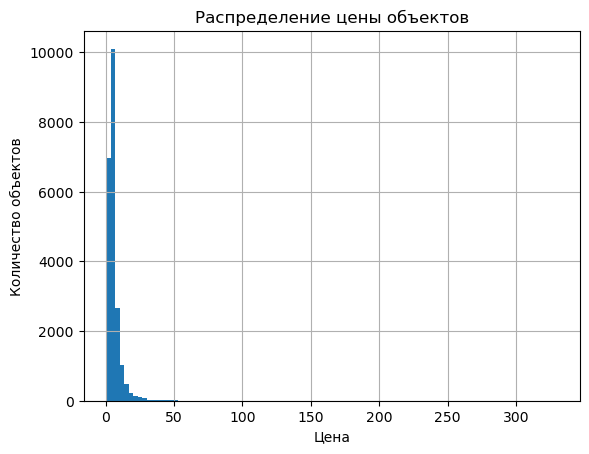

In [63]:
data['last_price'].hist(bins=100)
plt.xlabel('Цена')
plt.ylabel('Количество объектов')
plt.title('Распределение цены объектов')
plt.show()

Вызовем описание и построим диаграмму размаха:

In [64]:
data['last_price'].describe()

count    21899.000000
mean         6.048529
std          6.612058
min          0.430000
25%          3.450000
50%          4.600000
75%          6.700000
max        330.000000
Name: last_price, dtype: float64

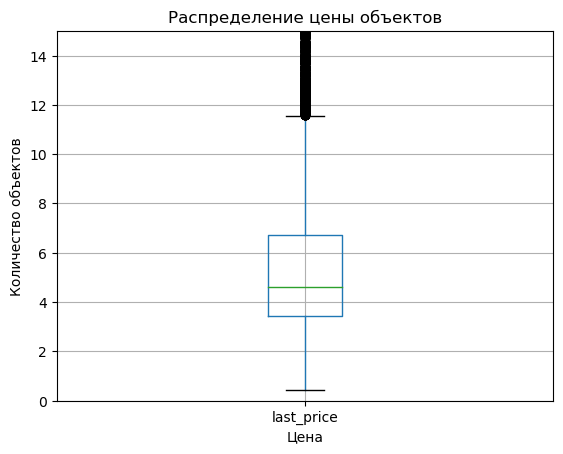

In [65]:
plt.ylim(0, 15)
data.boxplot('last_price')
plt.xlabel('Цена')
plt.ylabel('Количество объектов')
plt.title('Распределение цены объектов')
plt.show()

По диаграмме выбросы это цены выше 12 млн руб. Посчитаем их долю в данных:

In [66]:
len(data.query('last_price > 12'))/len(data['last_price'])*100

7.132745787478881

7% очень много, попробуем отсечь данные выше 40 млн руб.

In [67]:
len(data.query('last_price > 40'))/len(data['last_price'])*100

0.3790127403077766

0.4% можно убрать:

In [68]:
data = data.query('last_price <= 40')
data['last_price'].describe()

count    21816.000000
mean         5.795058
std          4.299643
min          0.430000
25%          3.430000
50%          4.600000
75%          6.650000
max         40.000000
Name: last_price, dtype: float64

##### Количество комнат

Строим гистограмму, диаграмму размаха и описание для столбца с количеством комнат:

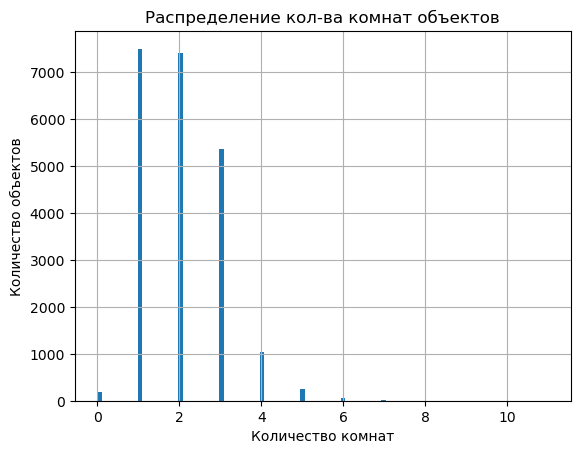

In [69]:
data['rooms'].hist(bins=100)
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.title('Распределение кол-ва комнат объектов')
plt.show()

In [70]:
data['rooms'].describe()

count    21816.00000
mean         2.03447
std          1.00204
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         11.00000
Name: rooms, dtype: float64

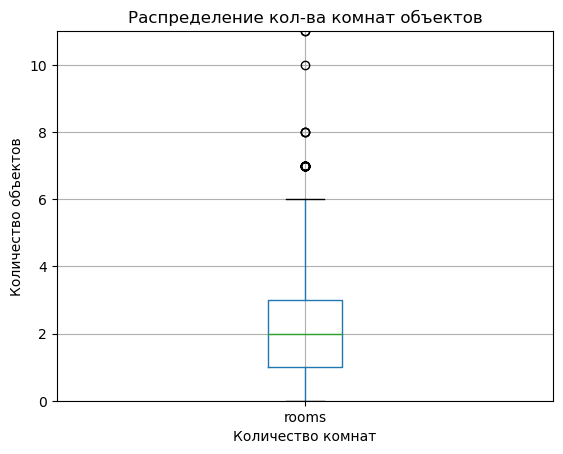

In [71]:
plt.ylim(0, 11)
data.boxplot('rooms')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.title('Распределение кол-ва комнат объектов')
plt.show()

Комнат больше 6 - вообще единичные значения, можно их попробовать отбросить. Сначала проверим их долю:

In [72]:
len(data.query('rooms > 6'))/len(data['rooms'])*100

0.1420975430876421

Всего 0.14% - отлично. Отбросим из данных:

In [73]:
data = data.query('rooms <= 6')
data['rooms'].describe()

count    21785.000000
mean         2.026762
std          0.980797
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

##### Высота потолков

Строим гистограмму и делаем описание данных для высоты потолков:

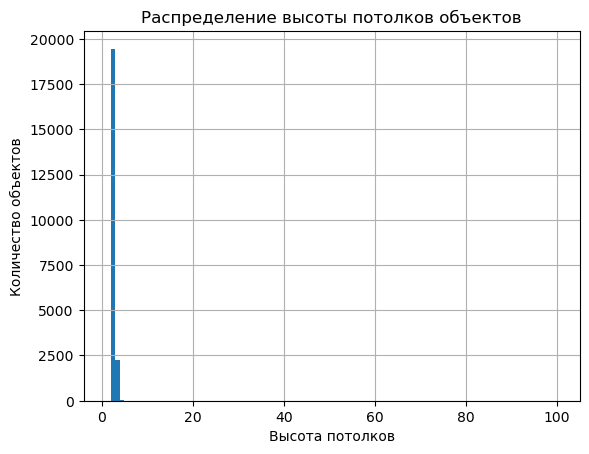

In [74]:
data['ceiling_height'].hist(bins=100)
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')
plt.title('Распределение высоты потолков объектов')
plt.show()

In [75]:
data['ceiling_height'].describe()

count    21785.000000
mean         2.722858
std          1.026817
min          1.000000
25%          2.560000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Поcмотрим на аномалии:

In [76]:
data['ceiling_height'].sort_values()

22590      1.00
5712       1.20
16934      1.75
16446      2.00
2572       2.00
          ...  
4876      27.00
21377     27.50
22336     32.00
3148      32.00
22869    100.00
Name: ceiling_height, Length: 21785, dtype: float64

Явно есть ошибка в постановке запятой в значении. Исправим. Возьму условие на потолки >= 20 м и поделим их на 10:

In [77]:
data.loc[data['ceiling_height'] >= 20.0, 'ceiling_height'] = data['ceiling_height']/10

Отсортируем полученный список значений:

In [78]:
data['ceiling_height'].sort_values()

22590     1.00
5712      1.20
16934     1.75
16446     2.00
20520     2.00
         ...  
17442     8.00
5863      8.30
22869    10.00
22309    10.30
15061    14.00
Name: ceiling_height, Length: 21785, dtype: float64

Стало лучше, но все равно есть подозрительные большие значения. Разберемся с ними.

Смотрим еще раз на распределение по гистограмме, стало получше:

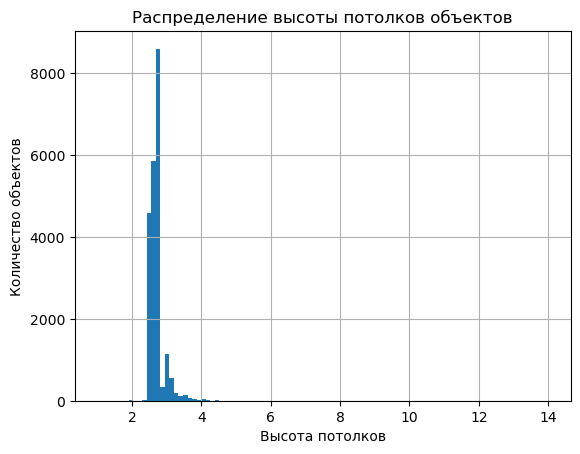

In [79]:
data['ceiling_height'].hist(bins=100)
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')
plt.title('Распределение высоты потолков объектов')
plt.show()

Посомотрим также на диаграмме размаха оставшиеся выбросы:

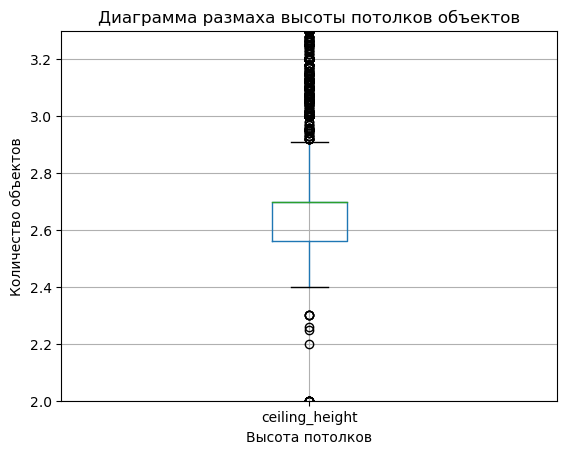

In [80]:
plt.ylim(2.0, 3.3)
data.boxplot('ceiling_height')
plt.xlabel('Высота потолков')
plt.ylabel('Количество объектов')
plt.title('Диаграмма размаха высоты потолков объектов')
plt.show()

Видно, что потолков > 2.85 м (хоть на диаграмме это и выбросы) - достаточно много, не исключено, что так и есть, т.к. в Питере много зданий с высокими потолками. Но вряд ли потолки со значениями от 5 до 20 м - это реальная картина (> 20 м мы поделили на 10). Поробуем посчитать долю таких потолков и отбросить при невысокой доле. Также посмотрим долю потолков < 2 м - эти значения тоже кажутся нереальными.

In [81]:
len(data.query('ceiling_height > 5'))/len(data['ceiling_height'])*100

0.04131282992885013

In [82]:
len(data.query('ceiling_height < 2'))/len(data['ceiling_height'])*100

0.013770943309616708

В сумме 0.05% - отбросим эти данные, проверим:

In [83]:
data = data.query('2 <= ceiling_height <= 5')
data['ceiling_height'].describe()

count    21773.000000
mean         2.692694
std          0.209887
min          2.000000
25%          2.560000
50%          2.700000
75%          2.700000
max          4.800000
Name: ceiling_height, dtype: float64

##### Тип этажа квартиры («первый», «последний», «другой»)

Построим гистограмму для типа этажа квартиры

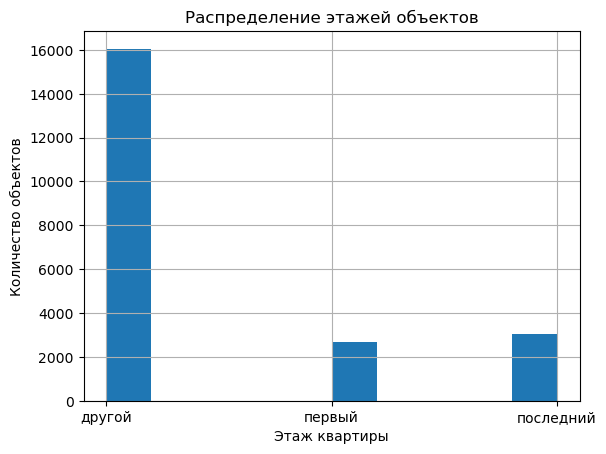

In [84]:
data['floor_category'].hist()
plt.xlabel('Этаж квартиры')
plt.ylabel('Количество объектов')
plt.title('Распределение этажей объектов')
plt.show()

Здесь все выглядит логично: больше всего значений в категории "другой".

##### Общее количество этажей в доме

Построим гистограмму по общему кол-ву этажей в доме:

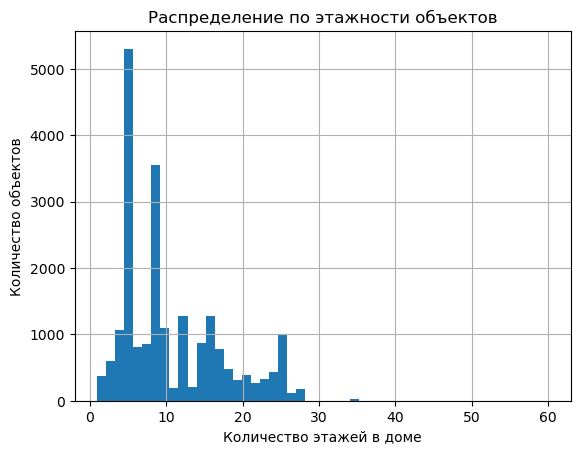

In [85]:
data['floors_total'].hist(bins=50)
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объектов')
plt.title('Распределение по этажности объектов')
plt.show()

Вызывают вопросы значения на гистограмме = 35. Проверим на диаграмме размаха и вызовем описание методом describe():

In [86]:
data['floors_total'].describe()

count    21773.000000
mean        10.728884
std          6.592920
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

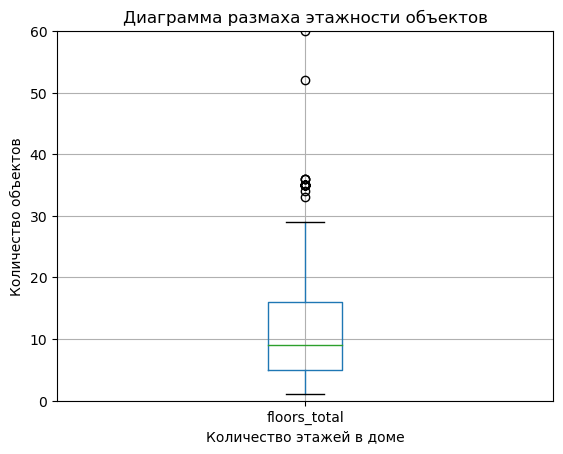

In [87]:
plt.ylim(0, 60)
data.boxplot('floors_total')
plt.xlabel('Количество этажей в доме')
plt.ylabel('Количество объектов')
plt.title('Диаграмма размаха этажности объектов')
plt.show()

По диаграмме видим, что есть выбросы в диапазоне 30-40 этажей, но согласну данным из общедоступных источников, самое высокое жилое здание в Питере - 37 этажей. Попробуем посчитать долю таких выбросов:

In [88]:
len(data.query('floors_total > 37'))/len(data['floors_total'])*100

0.009185688697010058

Совсем немного, можем исключить данные из таблицы (и проверить):

In [89]:
data = data.query('floors_total<=37')
data['floors_total'].describe()

count    21771.000000
mean        10.724726
std          6.578815
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         36.000000
Name: floors_total, dtype: float64

##### Расстояние до центра города в метрах

Строим гистограмму для расстояний до центра города:

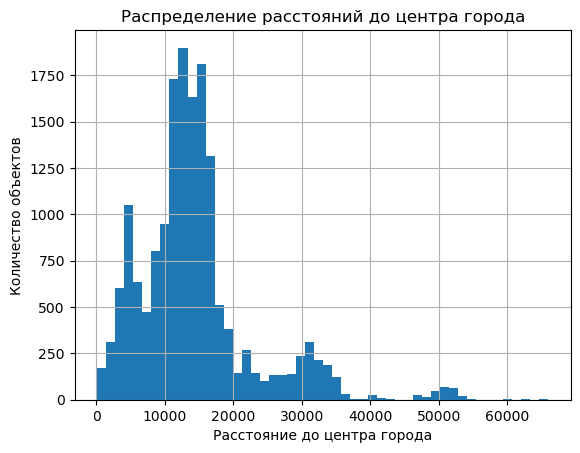

In [90]:
data['city_centers_nearest'].hist(bins=50)
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество объектов')
plt.title('Распределение расстояний до центра города')
plt.show()

Похоже на нормальное распределение, но есть выбивающиеся значения в районе 40000 до 70000 м. Посмотрим на диаграмме размаха:

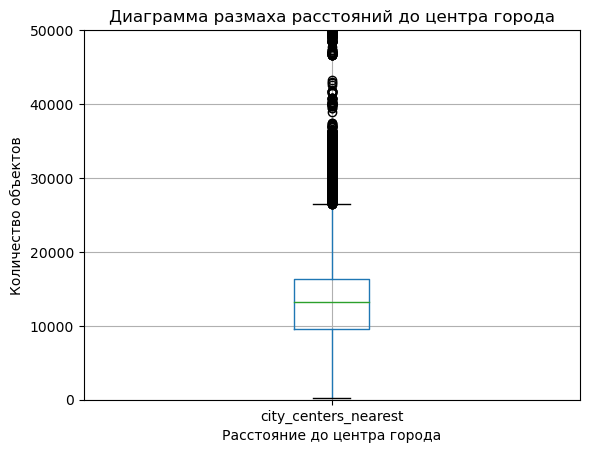

In [91]:
plt.ylim(0, 50000)
data.boxplot('city_centers_nearest')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество объектов')
plt.title('Диаграмма размаха расстояний до центра города')
plt.show()

In [92]:
data['city_centers_nearest'].describe()

count    16743.000000
mean     14371.987577
std       8631.069047
min        181.000000
25%       9577.000000
50%      13181.000000
75%      16336.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

Посмотрим долю выбросов от 25000 м:

In [93]:
len(data.query('city_centers_nearest > 25000'))/len(data['city_centers_nearest'])*100

8.336778283037068

Хм, очень много таких значений. Интересно, зависит ли это от населенного пункта?

In [94]:
data.groupby('locality_category')['city_centers_nearest'].agg('mean')

locality_category
Санкт-Петербург    11723.189217
город              34934.902373
поселок            23535.752336
снт                         NaN
Name: city_centers_nearest, dtype: float64

Похоже, так называемые выбросы на диаграмме размаха - это значения расстояния до центра Питера, в т.ч. от городов и поселков области. Не будем избавляться от них

##### Расстояние до ближайшего парка

Построим гистограмму расстояний до ближайшего парка:

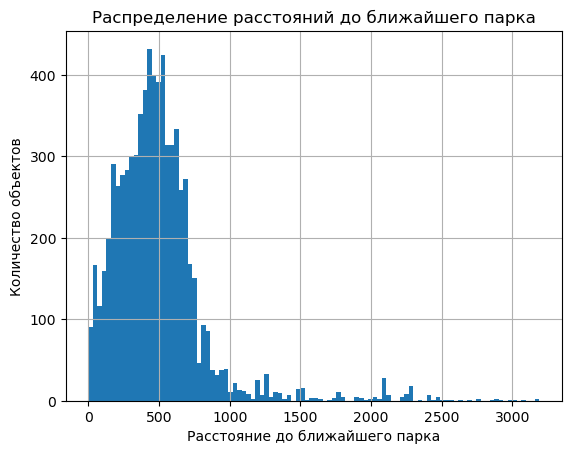

In [95]:
data['parks_nearest'].hist(bins=100)
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объектов')
plt.title('Распределение расстояний до ближайшего парка')
plt.show()

Выглядит нормально. Но как всегда есть выбросы, посмотрим их на диаграмме размаха и describe():

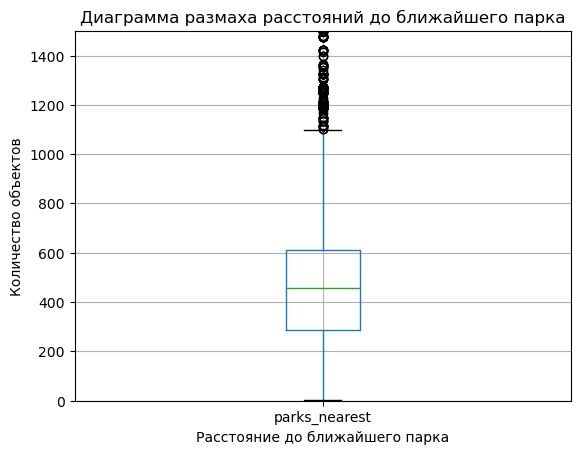

In [96]:
plt.ylim(0, 1500)
data.boxplot('parks_nearest')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество объектов')
plt.title('Диаграмма размаха расстояний до ближайшего парка')
plt.show()

In [97]:
data['parks_nearest'].describe()

count    7339.000000
mean      490.730345
std       339.725331
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

В целом, большие значения (>1100 м) - могут быть правдой, их трогать не будем. Проверим кол-во слишком маленьких, неправдоподобных значений (<10 м)

In [98]:
len(data.query('parks_nearest <= 10'))/len(data['parks_nearest'])*100

0.05971246153139497

Пока оставим как есть, возможно эти данные не пригодятся

#### Изучим, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.

Построим гистограмму для дней продажи и вызовем описание столбца:

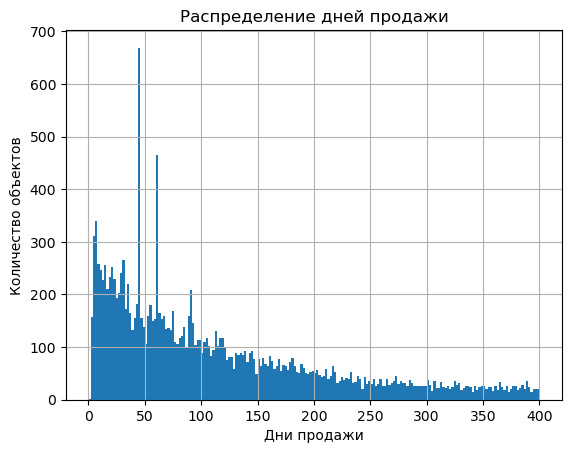

In [99]:
data['days_exposition'].hist(bins=200, range=(0,400))
plt.xlabel('Дни продажи')
plt.ylabel('Количество объектов')
plt.title('Распределение дней продажи')
plt.show()

In [100]:
data['days_exposition'].describe()

count    18807.000000
mean       183.033605
std        220.052676
min          1.000000
25%         44.000000
50%         99.000000
75%        235.000000
max       1580.000000
Name: days_exposition, dtype: float64

Среднее - 183 дня, медиана - 99 дней.

Построим диаграмму размаха:

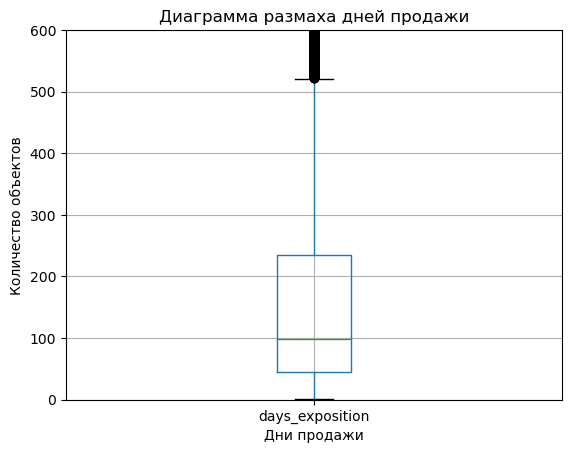

In [101]:
plt.ylim(0, 600)
data.boxplot('days_exposition')
plt.xlabel('Дни продажи')
plt.ylabel('Количество объектов')
plt.title('Диаграмма размаха дней продажи')
plt.show()

По диаграмме видно, почему так сильно отличается среднее от медианы (среднее больше) - потому что много выбросов > 500 дней, которые сильно влияют на среднее. В таких случаях лучше ориентироваться на медиану.

Пропущенные значения в столбце days_exposition могут быть связаны с тем, что квартиры еще не проданы

Обычно продажа занимает от 44 дней до 235 дней (это дни внутри 1го и 3го квартиля данных).Я бы сказала, что быстрыми продажами можно считать значения менее 44 дней - их менее 25 % от данных. Необычно долгими можно назвать более 520 дней (выбросы в диаграмме размаха).

#### Определим факторы, которые больше всего влияют на общую (полную) стоимость объекта. 

In [102]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,0.0,NaN,81.0,поселок,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,2.7,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.4,2018-09-10,1,2.6,12.0,14.4,5,False,...,NaN,NaN,55.0,поселок,95065.79,0,9,2018,другой,NaN
6,6,3.700,37.3,2017-11-02,1,2.6,26.0,10.6,6,False,...,0.0,NaN,155.0,поселок,99195.71,3,11,2017,другой,19.0


##### Изучим, зависит ли цена от общей площади:

Построим диаграмму рассеивания для визуализации зависимости параметров:

<Axes: title={'center': 'Зависимость цены от общей площади'}, xlabel='last_price', ylabel='total_area'>

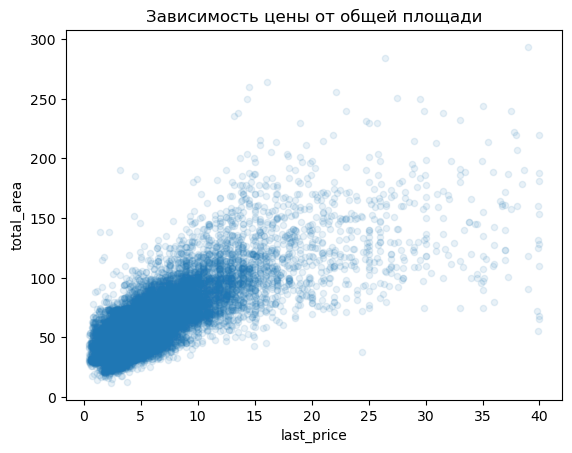

In [103]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1, title='Зависимость цены от общей площади') 

По графику видно, что между данными есть заметная положительная корреляция. Рассчитаем ее (посчитаем коффициент Пирсона):

In [104]:
data['last_price'].corr(data['total_area'])

0.7754765024742172

Итого: есть достаточно сильная прямая зависимость между ценой и общей площадью

<div class="alert alert-success">

**Артём:** 👍 Правильно.

##### Изучим, зависит ли цена от жилой площади:

Делаем все по аналогии: диаграмма рассеивания и коэффициент Пирсона:

<Axes: title={'center': 'Зависимость цены от жилой площади'}, xlabel='last_price', ylabel='living_area'>

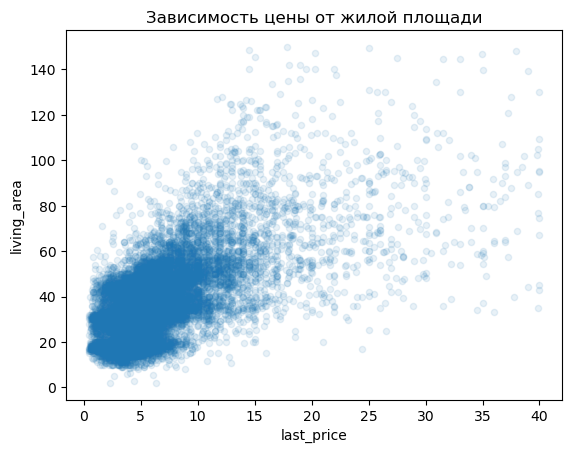

In [105]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1, title='Зависимость цены от жилой площади') 

In [106]:
data['last_price'].corr(data['living_area'])

0.6702316472766878

Корреляция поменьше, чем с общей площадью, но она тоже есть, как мы видим на графике. Значит, данные коррелируют

##### Изучим, зависит ли цена от площади кухни:

<Axes: title={'center': 'Зависимость цены от площади кухни'}, xlabel='last_price', ylabel='kitchen_area'>

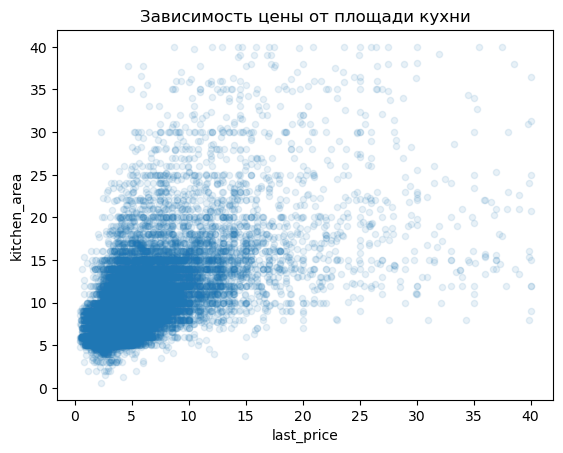

In [107]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1, title='Зависимость цены от площади кухни') 

In [108]:
data['last_price'].corr(data['kitchen_area'])

0.5894761691939248

Параметры коррелируют между собой, но это преимущественно в диапазоне данных до 10 млн руб и площади кухни до 17 м. По значениям больше идут выбросы, корреляция сильно уменьшается.

##### Изучим, зависит ли цена от количества комнат:

<Axes: title={'center': 'Зависимость цены от кол-ва комнат'}, xlabel='last_price', ylabel='rooms'>

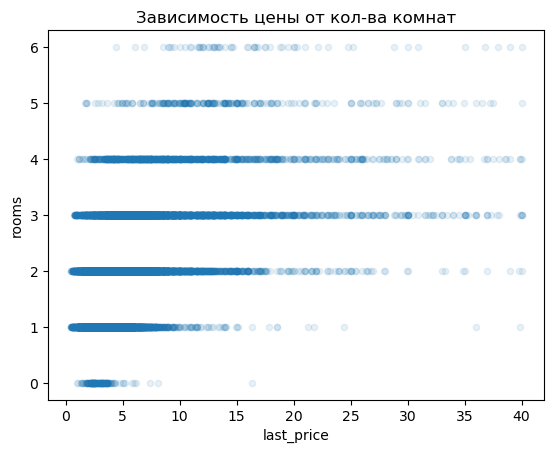

In [109]:
data.plot(x='last_price', y='rooms', kind='scatter', alpha=0.1, title='Зависимость цены от кол-ва комнат') 

In [110]:
data['last_price'].corr(data['rooms'])

0.4895786721492089

Есть корреляция, но не очень большая. При высокой стоимости квартир (например, 35 млн) мы не видим максимального числа комнат. Данные хорошо коррелируют по кол-ву комнат не более 3 (как видно из графика). 

<div class="alert alert-success">

**Артём:** 👍 Верно.

##### Изучим, зависит ли цена от этажа, на котором расположена квартира (первый, последний, другой):

<Axes: title={'center': 'Зависимость цены от этажа'}, xlabel='last_price', ylabel='floor_category'>

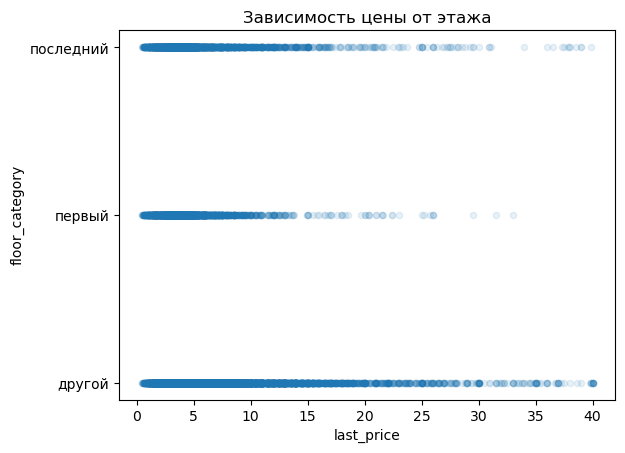

In [111]:
data.plot(x='last_price', y='floor_category', kind='scatter', alpha=0.1, title='Зависимость цены от этажа') 

Прямой зависимости мы не увидим в этих параметрах, но можно сказать, что первый этаж проигрывает в ценах другим этажам (последнему или любому другому). Также нужно понимать, что количество выборки по категориям этажей очень разное - "другой" этаж занимает значительное место по количеству значений в таблице(см. расчет ниже).

In [112]:
data.groupby('floor_category')['last_price'].count()

floor_category
другой       16052
первый        2683
последний     3036
Name: last_price, dtype: int64

##### Изучим, зависит ли цена от даты размещения (день недели, месяц, год):
Для нахождения зависимости цены от даты размещения предлагаю взять медиану, это объективнее т.к. на среднюю цену могут повлиять выбросы

Посмотрим визуализацию **зависимости цены от дня размещения**:

<Axes: title={'center': 'Зависимость цены от дня публикации'}, xlabel='last_price', ylabel='exposition_weekday'>

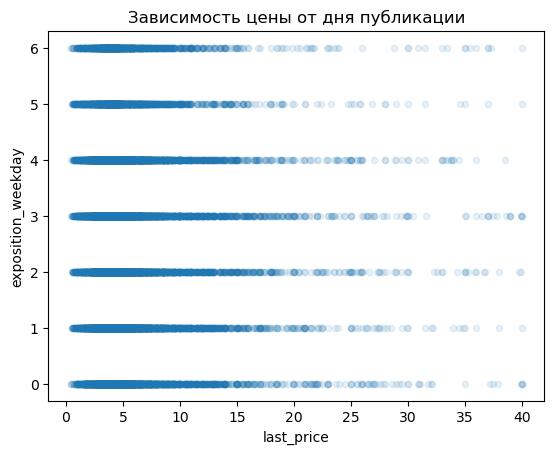

In [113]:
data.plot(x='last_price', y='exposition_weekday', kind='scatter', alpha=0.1, title='Зависимость цены от дня публикации') 

Сделаем сводную таблицу, чтобы посмотреть на медиану и количество значений по каждому дню недели

In [114]:
data.pivot_table(index='exposition_weekday', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
exposition_weekday,,
0,3346,4.635
1,3898,4.700
2,3653,4.700
3,3945,4.600
4,3679,4.550
5,1729,4.500
6,1521,4.500


И построим график зависимости цены от дня недели:

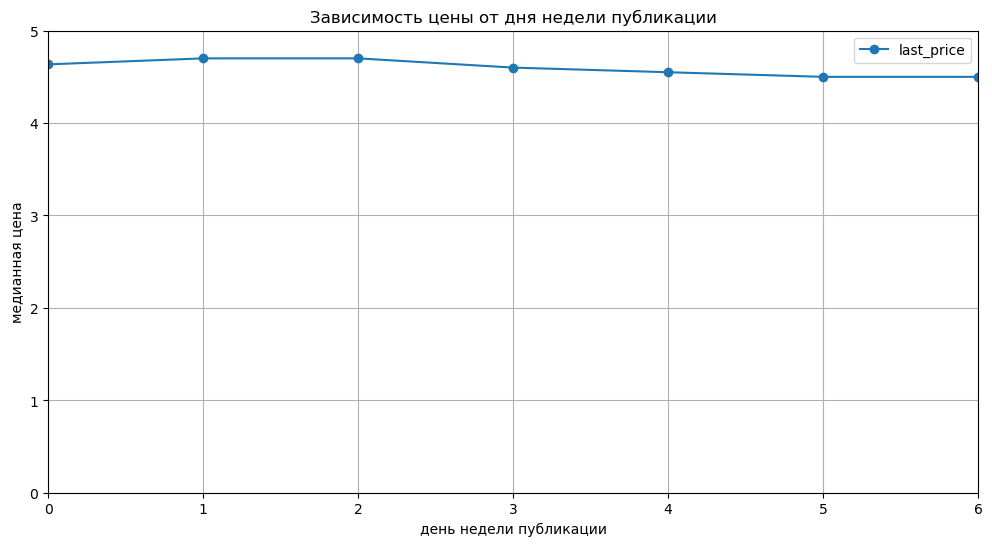

In [115]:
(
    data
    .pivot_table(index='exposition_weekday', values='last_price', aggfunc='median')
    .plot(style='o-', grid=True,figsize=(12, 6), title='Зависимость цены от дня недели публикации')
)
plt.xlim(0, 6)
plt.ylim(0, 5)
plt.ylabel('медианная цена')
plt.xlabel('день недели публикации')
plt.show()

Больше всего квартир продано в день размещения четверг. Это мы видим и на диаграмме рассеивания. По медиане видим, что самая высокая цена в день размещения объявления вторник (4.7 млн руб), затем чуть снижается в среду, и имеет плавное заметное снижение вплоть до субботы и воскресения (до 4.5 млн руб). 

Посмотрим **зависимость цены от месяца размещения**:

<Axes: title={'center': 'Зависимость цены от месяца'}, xlabel='last_price', ylabel='exposition_month'>

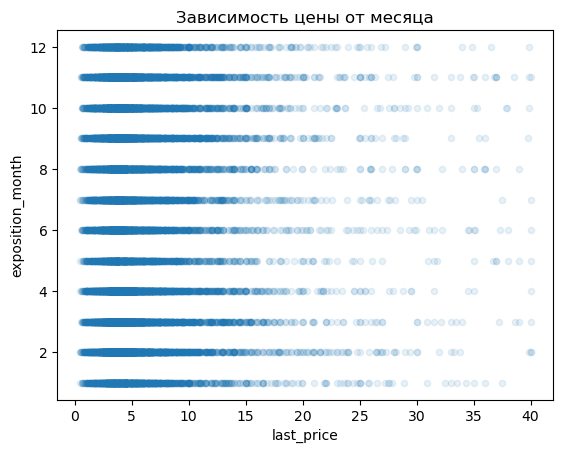

In [116]:
data.plot(x='last_price', y='exposition_month', kind='scatter', alpha=0.1, title='Зависимость цены от месяца') 

In [117]:
data.pivot_table(index='exposition_month', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
exposition_month,,
1,1325,4.60
2,2378,4.65
3,2368,4.60
4,2210,4.75
5,1193,4.50
6,1617,4.40
7,1537,4.55
8,1628,4.55


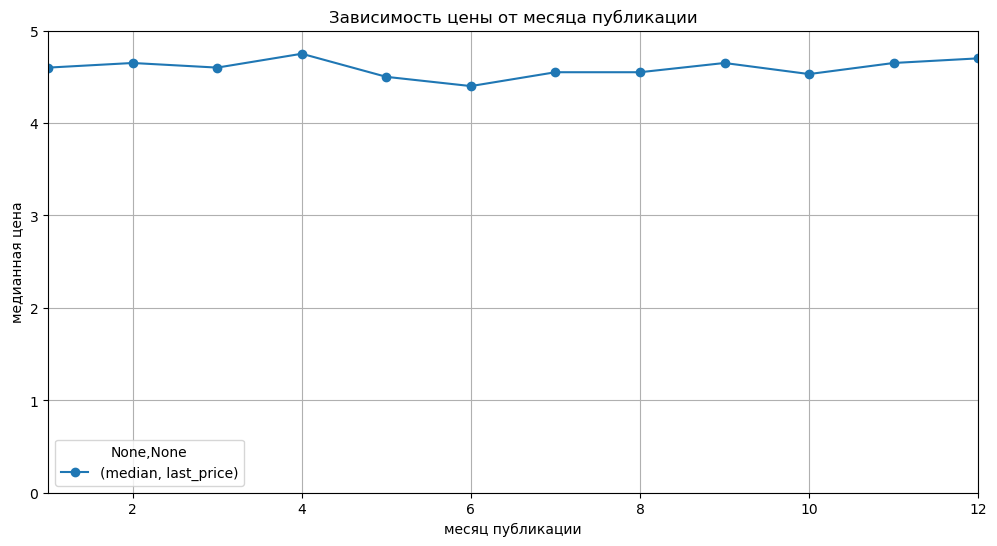

In [118]:
(
    data
    .pivot_table(index='exposition_month', values='last_price', aggfunc=['median'])
    .plot(style='o-', grid=True,figsize=(12, 6), title='Зависимость цены от месяца публикации')
)
plt.xlim(1, 12)
plt.ylim(0, 5)
plt.ylabel('медианная цена')
plt.xlabel('месяц публикации')
plt.show()

Можно выделить два самых "дорогих" месяца - апрель и декабрь (4.75 и 4.7 млн руб соответственно). Дешевле всего квартиры, опубликованные на продажу в июне (4.4 млн руб). Заметно снижение цены в период с мая по август, а также в октябре (до 4.53 млн руб).

Посмотрим **зависимость цены от года размещения**:

<Axes: title={'center': 'Зависимость цены от года'}, xlabel='last_price', ylabel='exposition_year'>

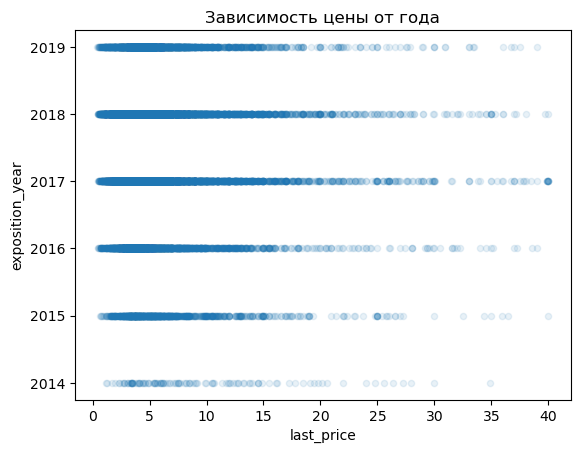

In [119]:
data.plot(x='last_price', y='exposition_year', kind='scatter', alpha=0.1, title='Зависимость цены от года') 

Кажется, больше всего квартир было продано и цены на них выше в 2017 г. Сделаем сводную таблицу и проверим гипотезу:

In [120]:
data.pivot_table(index='exposition_year', values='last_price', aggfunc=['count', 'median'])

,count,median
,last_price,last_price
exposition_year,,
2014,121,7.265
2015,1080,5.200
2016,2617,4.450
2017,7583,4.500
2018,7636,4.595
2019,2734,5.000


И построим график для визуализации:

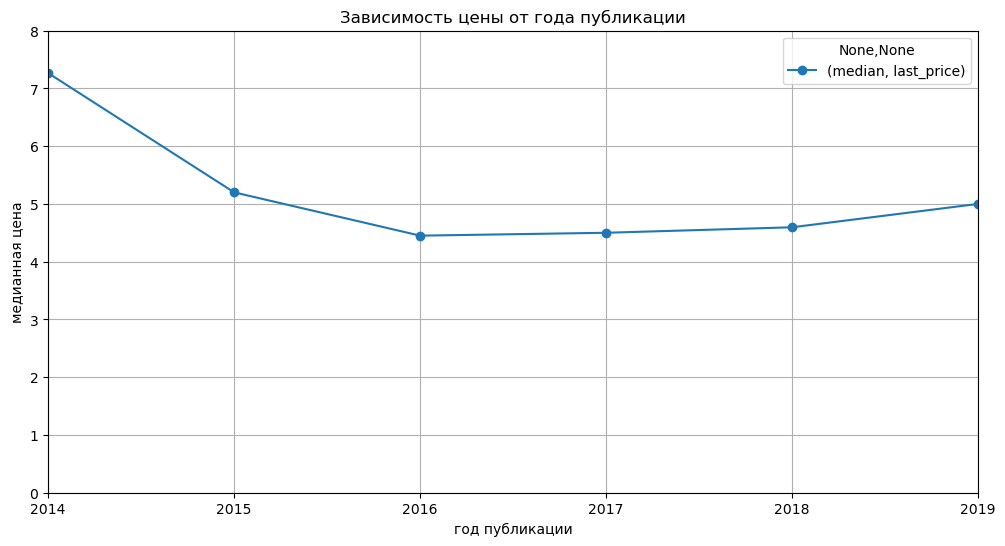

In [121]:
(
    data
    .pivot_table(index='exposition_year', values='last_price', aggfunc=['median'])
    .plot(style='o-', grid=True,figsize=(12, 6), title='Зависимость цены от года публикации')
)
plt.xlabel('год публикации')
plt.ylabel('медианная цена')
plt.xlim(2014,2019)
plt.ylim(0,8)
plt.show()

Да, данных больше по 2017 году, но также и 2018 году (см. сводную таблицу). Но медиана цен отнюдь не самая большая по 2017 году. Самая высокая медиана - по 2014 г - но данных по 2014 году очень мало (всего 121), далее идет 2015 год - но по нему тоже гораздо меньше данных, чем по другим годам, возможно такая высокая медиана - не совсем объективна из-за маленькой выборки. А вот по следующим годам есть явный лидер медианы цен (5 млн) - 2019 год. Также можно сказать, что идет плавное увеличение цен, начиная с 2016 года (от 4.5 млн руб) до 2019 года.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений — постройте сводную таблицу с количеством объявлений и средней ценой квадратного метра для этих населенных пунктов. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра.

In [122]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,0.0,NaN,81.0,поселок,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,2.7,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.4,2018-09-10,1,2.6,12.0,14.4,5,False,...,NaN,NaN,55.0,поселок,95065.79,0,9,2018,другой,NaN
6,6,3.700,37.3,2017-11-02,1,2.6,26.0,10.6,6,False,...,0.0,NaN,155.0,поселок,99195.71,3,11,2017,другой,19.0


In [123]:
local_avg_price = data.pivot_table(index='locality_name', values='one_meter_price', aggfunc=['mean', 'count'])
local_avg_price.columns = ['avg_meter_price', 'count']
local_avg_price

,avg_meter_price,count
locality_name,,
Бокситогорск,17336.369091,11
Волосово,40144.608000,35
Волхов,35195.800816,98
Всеволожск,68880.130943,371
Выборг,58242.714363,204
...,...,...
снт Лесная Поляна,22580.650000,1
снт Новая Ропша,81081.080000,1
снт Приладожский,44166.670000,1


Выведем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений:

In [124]:
sort = local_avg_price.sort_values(by='count', ascending=False).head(10)
sort

,avg_meter_price,count
locality_name,,
Санкт-Петербург,111153.967778,14455
поселок Мурино,86143.889863,511
поселок Шушары,78792.923440,407
Всеволожск,68880.130943,371
Пушкин,103090.458201,339
Колпино,75249.775443,327
поселок Парголово,90381.746854,302
Гатчина,68684.401149,296
поселок Кудрово,92606.426929,267


И можем посмотреть населенные пункты в порядке возрастания цены за кв.м. (из нашей отфильтрованной таблички по количеству самых частых объявлений)

In [125]:
sort_locality = sort.sort_values(by='avg_meter_price')
sort_locality

,avg_meter_price,count
locality_name,,
Выборг,58242.714363,204
Гатчина,68684.401149,296
Всеволожск,68880.130943,371
Колпино,75249.775443,327
поселок Шушары,78792.923440,407
поселок Мурино,86143.889863,511
поселок Парголово,90381.746854,302
поселок Кудрово,92606.426929,267
Пушкин,103090.458201,339


In [126]:
# переименую на русский язык столбцы, так как таблица пойдет в выводы для заказчика
sort_locality.columns = ['Средняя цена за кв.м.', 'Количество объявлений']
sort_locality

,Средняя цена за кв.м.,Количество объявлений
locality_name,,
Выборг,58242.714363,204
Гатчина,68684.401149,296
Всеволожск,68880.130943,371
Колпино,75249.775443,327
поселок Шушары,78792.923440,407
поселок Мурино,86143.889863,511
поселок Парголово,90381.746854,302
поселок Кудрово,92606.426929,267
Пушкин,103090.458201,339


Итак, самая высокая стоимость за кв.м. 111153 руб - в Санкт-Петербурге (что логично). Самая низкая - 58242 в Выборге.  

#### Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите их среднюю стоимость на разном удалении от центра. Учитывайте каждый километр расстояния: узнайте среднюю цену квартир в одном километре от центра, в двух и так далее. Опишите, как стоимость объектов зависит от расстояния до центра города — постройте график изменения средней цены для каждого километра от центра Петербурга.

In [127]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,locality_category,one_meter_price,exposition_weekday,exposition_month,exposition_year,floor_category,city_centers_nearest_km
0,20,13.000,108.0,2019-03-07,3,2.7,16.0,51.0,8,False,...,2.0,755.0,NaN,Санкт-Петербург,120370.37,3,3,2019,другой,16.0
1,7,3.350,40.4,2018-12-04,1,2.6,11.0,18.6,1,False,...,0.0,NaN,81.0,поселок,82920.79,1,12,2018,первый,19.0
2,10,5.196,56.0,2015-08-20,2,2.7,5.0,34.3,4,False,...,2.0,574.0,558.0,Санкт-Петербург,92785.71,3,8,2015,другой,14.0
5,10,2.890,30.4,2018-09-10,1,2.6,12.0,14.4,5,False,...,NaN,NaN,55.0,поселок,95065.79,0,9,2018,другой,NaN
6,6,3.700,37.3,2017-11-02,1,2.6,26.0,10.6,6,False,...,0.0,NaN,155.0,поселок,99195.71,3,11,2017,другой,19.0


Создадим сводную таблицу, отфильтровав по Санкт-Петербургу, со значениями расстояния до центра города в км и средней ценой по каждому км:

In [128]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')
)

,last_price
city_centers_nearest_km,
0.0,15.338706
1.0,11.600708
2.0,11.663802
3.0,9.584596
4.0,10.676813
5.0,10.914682
6.0,10.215317
7.0,10.322503
8.0,8.942219


И построим график для визуализации зависимости средней цены от удаленности от центра города:

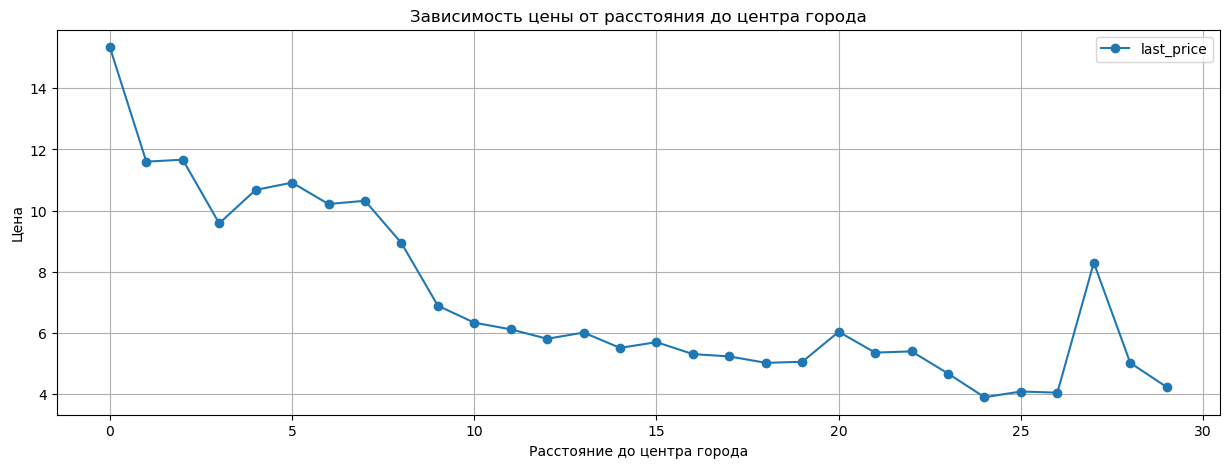

In [129]:
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='city_centers_nearest_km', values='last_price')  
    .plot(style='o-', grid=True, figsize=(15,5), title='Зависимость цены от расстояния до центра города')
)
plt.ylabel('Цена')
plt.xlabel('Расстояние до центра города')
plt.show()

В целом, зависимость средней цены от удаленности от центра наблюдается - она снижается при увеличении удаленности. Самые дорогие квартиры находятся в центре города (почти до 16 млн руб). Далее видим падение средней цены до 3 км с каждым км от центра (до 9 млн руб). Затем от 4 до 5 км цена немного повышается (почти до 11 млн руб, возможно это зависит от качества района, в котором расположены квартиры). Более 5 км снова наблюдается падение цен с каждым км вплоть до 19 км (до 5 млн руб, исключение составляет цена на 13 км, она чуть выше цены на 12 км). На 20 км видим возрастание цены до 6 млн руб, после 20 км снова понижение с каждым км (кроме 21-22 км - они близкие) до 24 км (до 4 млн руб). После 24 км наблюдается небольшое увеличение цены до 26 км и видим резкое увеличение цены на 27 км (примерно до 8 млн руб, возможно это выброс или это район с элитными объектами недвижимости, которые увеличивают среднюю цену).После 27 км и снова уменьшение цены до 4 млн руб.

### Напишите общий вывод

Итак, в данной работе был проведен исследовательский анализ данных из архива объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Сначала была изучена общая информация о датасете. Затем выполнена предобработка данных - найдены и изучены пропущенные значения в столбцах, рассмотрены и преобразованы типы данных в столбцах, устранены неявные дубликаты в столбце с названиями населенных пунктов. Добавлены в таблицу новые столбцы со следующими параметрами:
- цена одного квадратного метра (нужно поделить стоимость объекта на его общую площадь, а затем округлить до двух знаков после запятой);
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

И, наконец, проведен анализ данных, в результате которого определены основные параметры, влияющие на среднюю рыночную стоимость.

#### Общая площадь, жилая площадь, площадь кухни

Все эти 3 параметра взаимосвязаны, поэтому рассмотрим зависимость цены от них в одном выводе. Самая большая корреляция 0.78 (прямая зависимость) наблюдается у цены и общей площади, т.е. в 78% случаев цена напрямую зависит от увеличения жилой площади объекта. Зависимость цены от жилой площади и кухни чуть ниже - 0.67 и 0.59 соответственно. Можно также сказать, что такая сильная прямая зависимость характерна для квартир стоимостью до 12-13 млн руб и общей площадью около 100 кв.м.

См. графики:
- 'Зависимость цены от общей площади'
- 'Зависимость цены от жилой площади'
- 'Зависимость цены от площади кухни'
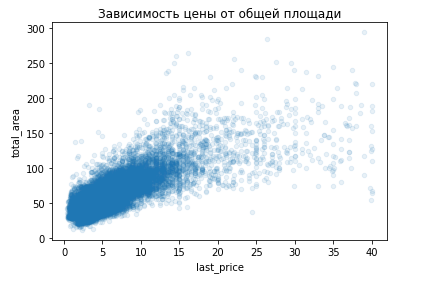
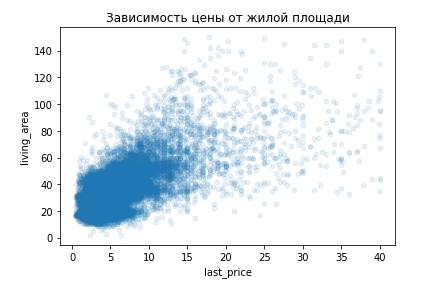
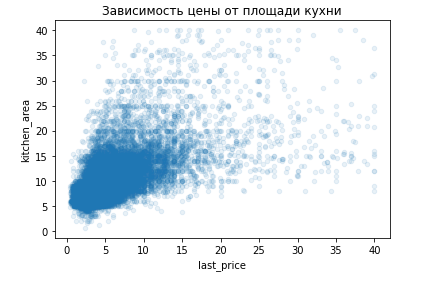

#### Количество комнат

Можно сказать, что цена растет до 20 млн руб в зависимости от количества комнат от 0 до 3. При ценах выше 20 млн руб наблюдается даже обратная зависимость - количество комнат с повышением цены снижается.

См. график 'Зависимость цены от кол-ва комнат'

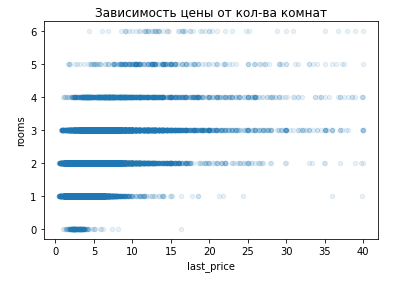

#### Этаж, на котором расположена квартира

Самые низкие цены по первому этажу. На квартиры на последнем этаже цены повыше. Самые высокие цены на квартиры на других этажах, но нужно учитывать количество выборки по этим категориям очень разное - "другой" этаж занимает значительное место по количеству значений в таблице по сравнению с первым и последним этажами (74%). Поэтому однозначно скажем только про первый этаж - там квартиры дешевле, чем на последних этажах.

См. график 'Зависимость цены от этажа'

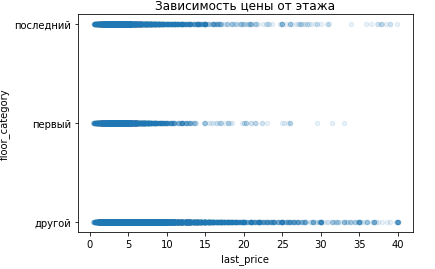

#### Дата размещения

##### День размещения

Больше всего квартир продано в день размещения четверг. По медиане цены видим, что самая высокая цена в день размещения объявления вторник (4.7 млн руб), затем чуть снижается в среду, и имеет плавное заметное снижение вплоть до субботы и воскресения (до 4.5 млн руб).

См. график 'Зависимость цены от дня недели публикации'

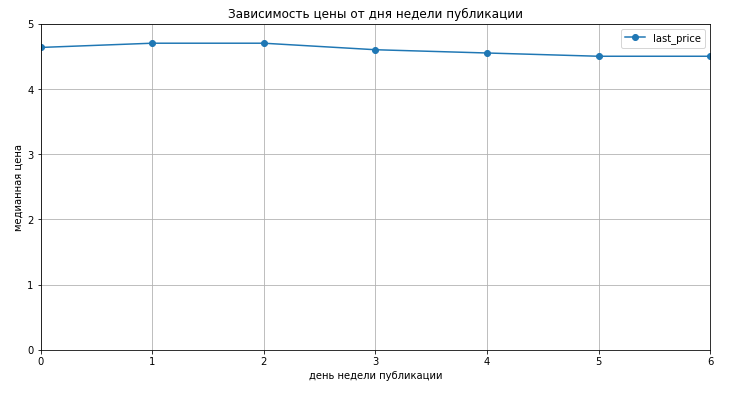

##### Месяц размещения

Можно выделить два самых "дорогих" месяца - апрель и декабрь (4.75 и 4.7 млн руб соответственно). Дешевле всего квартиры, опубликованные на продажу в июне (4.4 млн руб). Заметно снижение цены в период с мая по август, а также в октябре (до 4.53 млн руб).

См.график 'Зависимость цены от месяца публикации'

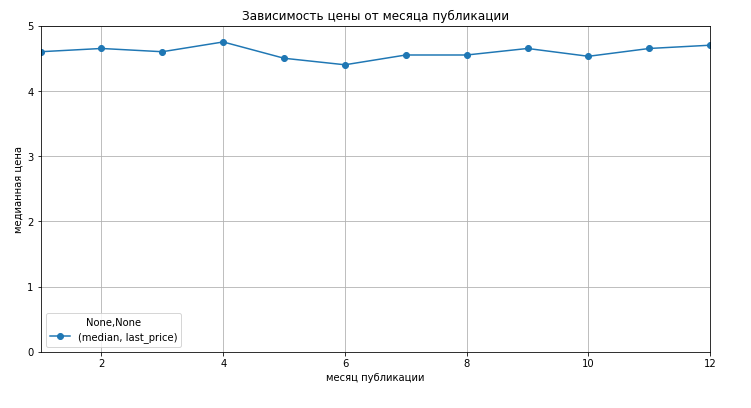

##### Год размещения

Данных в таблице больше по 2017 году, но также и 2018 году (см. сводную таблицу). Но медиана цен отнюдь не самая большая по 2017 году. Самая высокая медиана цен - по 2014 г - но данных по 2014 году очень мало (всего 121), следующая по возрастанию медиана цен за 2015 год - но по нему тоже гораздо меньше данных, чем по другим годам, возможно такая высокая медиана - не совсем объективна из-за маленькой выборки. А вот по следующим годам есть явный лидер медианы цен (5 млн) - 2019 год. Также можно сказать, что идет плавное увеличение цен, начиная с 2016 года (от 4.5 млн руб) до 2019 года.

См. график 'Зависимость цены от года публикации'

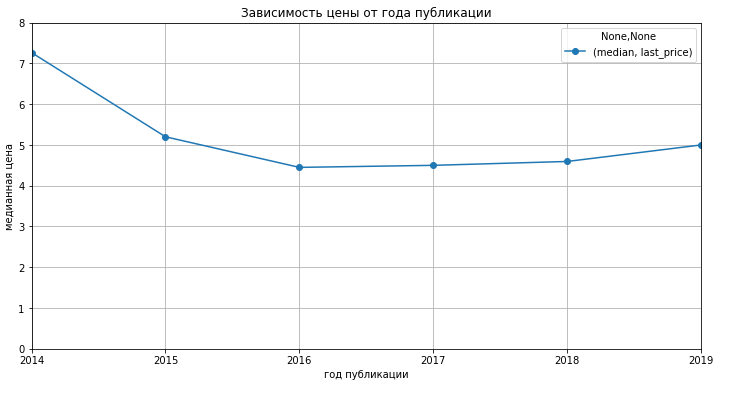

#### Населенный пункт

Наблюдается зависимость средней цены за квадратный метр в зависимости от населенного пункта. Для исследования взяты 10 населенных пунктов с наибольшим количеством объявлений. Итак, самая высокая стоимость за кв.м. 110598 руб - в Санкт-Петербурге (что логично). Самая низкая - 58242 в Выборге.

См. таблицу:

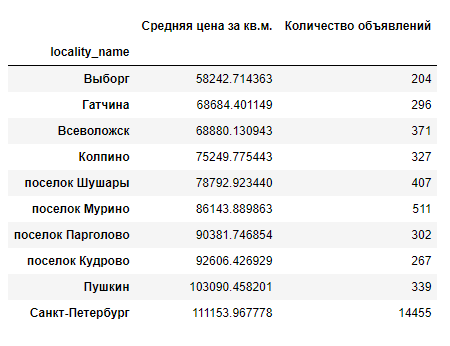

#### Удаленность от центра города

Конечно же, есть зависимость цены и от параметра: расстояние до центра города. В целом, зависимость средней цены от удаленности от центра наблюдается - она снижается при увеличении удаленности. Самые дорогие квартиры находятся в центре города (почти до 16 млн руб). Далее видим падение средней цены до 3 км с каждым км от центра (до 9 млн руб). Затем от 4 до 5 км цена немного повышается (почти до 11 млн руб, возможно это зависит от качества района, в котором расположены квартиры). Более 5 км снова наблюдается падение цен с каждым км вплоть до 19 км (до 5 млн руб, исключение составляет цена на 13 км, она чуть выше цены на 12 км). На 20 км видим возрастание цены до 6 млн руб, после 20 км снова понижение с каждым км (кроме 21-22 км - они близкие) до 24 км (до 4 млн руб). После 24 км наблюдается небольшое увеличение цены до 26 км и видим резкое увеличение цены на 27 км (примерно до 8 млн руб, возможно это выброс или это район с элитными объектами недвижимости, которые увеличивают среднюю цену).После 27 км и снова уменьшение цены до 4 млн руб.

См. график 'Зависимость цены от расстояния до центра города'

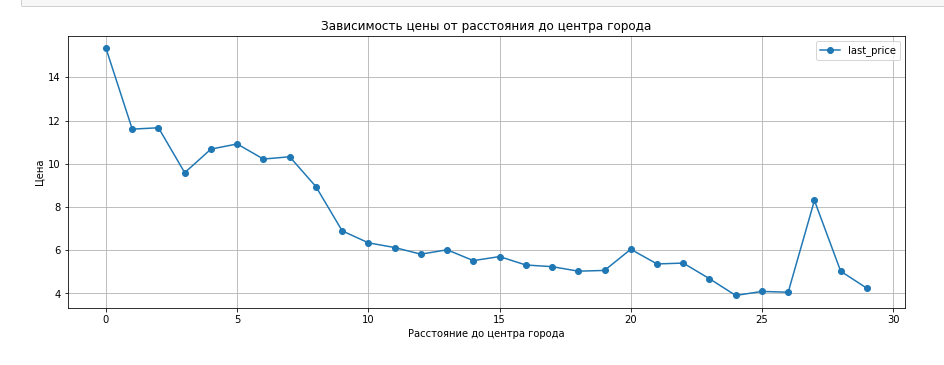